<a href="https://colab.research.google.com/github/Sachin-D-N/Amazon_Food_Reviews/blob/main/08.Random_Forest_Amazon_Food_Reviews/Random_Forest_Amazon_Food_Reviews_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Fine Food Reviews Analysis


Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews <br>

EDA: https://nycdatascience.com/blog/student-works/amazon-fine-foods-visualization/


The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review


#### Objective:
Given a review, determine whether the review is positive (rating of 4 or 5) or negative (rating of 1 or 2).

<br>
[Q] How to determine if a review is positive or negative?<br>
<br> 
[Ans] We could use Score/Rating. A rating of 4 or 5 can be cosnidered as a positive review. A rating of 1 or 2 can be considered as negative one. A review of rating 3 is considered nuetral and such reviews are ignored from our analysis. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.




# Assignment : Apply Random Forests

<ol>
    <li><strong>Apply Random Forests & GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>SET 1:</font>Review text, preprocessed one converted into vectors using (BOW)</li>
            <li><font color='red'>SET 2:</font>Review text, preprocessed one converted into vectors using (TFIDF)</li>
            <li><font color='red'>SET 3:</font>Review text, preprocessed one converted into vectors using (AVG W2v)</li>
            <li><font color='red'>SET 4:</font>Review text, preprocessed one converted into vectors using (TFIDF W2v)</li>
        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider two hyperparameters: n_estimators & max_depth)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Feature importance</strong>
        <ul>
    <li>Get top 20 important features and represent them in a word cloud. Do this for BOW & TFIDF.</li>
        </ul>
    </li>
    <br>
    <li><strong>Feature engineering</strong>
        <ul>
    <li>To increase the performance of your model, you can also experiment with with feature engineering like :</li>
            <ul>
            <li>Taking length of reviews as another feature.</li>
            <li>Considering some features from review summary as well.</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong>  , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong>  </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
    </li>
      


###  we already strored the preprocessed_data in a file to know the preprocessing steps visit <a href='https://github.com/Sachin-D-N/Amazon_Food_Reviews/blob/main/01.Amazon_Fine_Food_Review_Analysis_Featurization/Amazon%20Fine%20Food%20Reviews%20Analysis.ipynb'>here </a>

In [ ]:
#loading Libraries
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load the preprocessed data 
data=pd.read_csv('/content/drive/My Drive/preprocessed_data.csv',nrows=50000) 

In [ ]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,preprocessed_reviews,preprocessed_summary
0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...,everi book educ
1,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...,love book miss hard cover version
2,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way children learn month year learn poem t...,chicken soup rice month
3,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,1,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,great littl book read aloud nice rhythm well g...,good swingi rhythm read aloud
4,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,1,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,book poetri month year goe month cute littl po...,great way learn month


In [ ]:
#use preprocessed_reviews and score for building a model
X=data['preprocessed_reviews'].values
Y=data['Score'].values

In [ ]:
print(X.shape)
print(Y.shape)

(50000,)
(50000,)


# Featurization using Bag_of_words

In [ ]:
#data splitting
#define a function for splitting of data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(35000,) (35000,)
(15000,) (15000,)


In [ ]:
#Apply Bow Features on Splitted data
from sklearn.feature_extraction.text import CountVectorizer
Vect=CountVectorizer()
Bow_train=Vect.fit_transform(X_train)
Bow_test=Vect.transform(X_test)
print(Bow_train.shape,Y_train.shape)
print(Bow_test.shape,Y_test.shape)

(35000, 26143) (35000,)
(15000, 26143) (15000,)


# Applying Random Forest


In [ ]:
#hyperparameter tuning 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,roc_curve,auc
from sklearn.ensemble import RandomForestClassifier
import graphviz as gz
import plotly.offline as offline
import plotly.graph_objs as go
#offline.init_notebook_mode()
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
import math

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
# Hyperparameter tuning
#Grid Search Cross validation for hyper_parameter tuning
def Grid_search(model,X_train,Y_train):
    estimators = [50,100,200,300,400,500]
    Depths = [10,20,30,40,50,60]

    param_grid = {'max_depth': Depths, 'n_estimators': estimators}
    
    clf = GridSearchCV(model, param_grid, scoring = 'roc_auc', cv=3 , n_jobs = -1, pre_dispatch=2,return_train_score=True)
    clf.fit(X_train, Y_train)

   
    print("\n**********AUC Score for CV data **********\n")
    print("\nOptimal depth:", clf.best_estimator_.max_depth)
    print("\nOptimal estimators:", clf.best_estimator_.n_estimators)
    print("\nBest Score:", clf.best_score_)

    sns.set()
    df_gridsearch = pd.DataFrame(clf.cv_results_)
    max_scores = df_gridsearch.groupby(['param_max_depth','param_n_estimators']).max()
    max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
    sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g')
    plt.show()


**********AUC Score for CV data **********


Optimal depth: 60

Optimal estimators: 500

Best Score: 0.8998787162664549


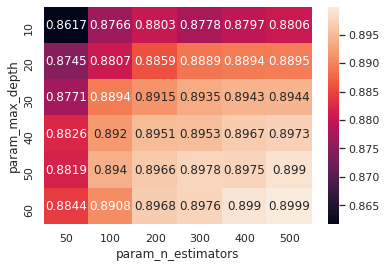

In [ ]:
import warnings
#gridsearch for optimal depth and estimators
model=RandomForestClassifier()
Grid_search(model,Bow_train,Y_train)

In [ ]:
#optimal depth and n_estimators by grid_search_cv
depth=60
estimators=500

In [ ]:
#function for testing test data
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

def test_data(model,x_train,y_train,x_test,y_test):
     
   
    model.fit(x_train, y_train)
    
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    train_fpr, train_tpr, thresholds = roc_curve(y_train, model.predict_proba(x_train)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

    sns.set()
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.plot([0, 1], [0, 1], color='green', lw=1, linestyle='--')
    plt.legend()
    plt.xlabel("False_positive_rate")
    plt.ylabel("True positive_rate")    
    plt.title("ROC_Curve")
    plt.grid()
    plt.show()
    print('The AUC_score of test_data is :',auc(test_fpr, test_tpr))

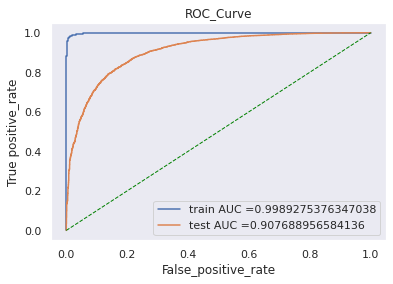

The AUC_score of test_data is : 0.907688956584136


In [ ]:
#testing with test data
model=RandomForestClassifier(max_depth=depth, n_estimators=estimators,class_weight='balanced') 
test_data(model,Bow_train,Y_train,Bow_test,Y_test)

In [ ]:
#defining a function for computing the metric score
#Confusion matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def metric(model,x_train,y_train,x_test,y_test):
    
    model.fit(x_train, y_train)
    predict=model.predict(x_test)

    conf_mat = confusion_matrix(Y_test, predict)
    class_label = ["Negative", "Positive"]
    df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
    
    report=classification_report(y_test,predict)
    print(report)
    
    sns.set()
    sns.heatmap(df, annot = True,fmt="d")
    plt.title("Test_Confusion_Matrix")
    plt.xlabel("Predicted_Label")
    plt.ylabel("Actual_Label")
    plt.show()

              precision    recall  f1-score   support

           0       0.81      0.42      0.55      2237
           1       0.91      0.98      0.94     12763

    accuracy                           0.90     15000
   macro avg       0.86      0.70      0.75     15000
weighted avg       0.89      0.90      0.88     15000



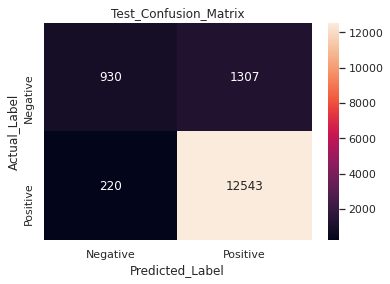

In [ ]:
#performance metric
model=RandomForestClassifier(max_depth=depth, n_estimators=estimators,class_weight='balanced') 
metric(model,Bow_train,Y_train,Bow_test,Y_test)

# Feature Importance on BOW

 Top 20 important features 

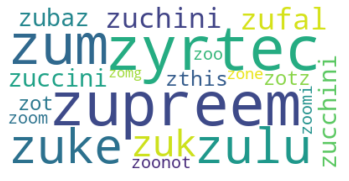

In [ ]:
# top 20 important features
model=RandomForestClassifier(max_depth=depth, n_estimators=estimators,class_weight='balanced') 
model.fit(Bow_train, Y_train)

weight=model.feature_importances_

all_features=Vect.get_feature_names()

features=np.argsort(all_features)[::-1]

data=''

for i in features[0:20]:
    data+=all_features[i]
    data+=' '
    
    
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(data)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Featurization using TFIDF

In [ ]:
# difine the tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf=TfidfVectorizer(ngram_range=(1, 2),min_df=10)
Train_tf_idf=tf_idf.fit_transform(X_train)
Test_tf_idf=tf_idf.transform(X_test)
print(Train_tf_idf.shape,Y_train.shape)
print(Test_tf_idf.shape,Y_test.shape)

(35000, 21050) (35000,)
(15000, 21050) (15000,)


Applying Random_Forest on tfidf features,


**********AUC Score for CV data **********


Optimal depth: 60

Optimal estimators: 500

Best Score: 0.9197247548567663


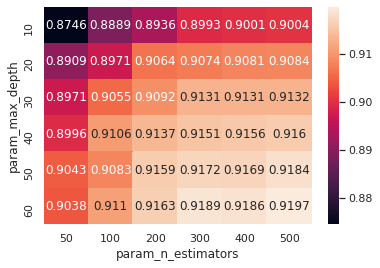

In [ ]:
#gridsearch for optimal depth and estimators
model=RandomForestClassifier()
Grid_search(model,Train_tf_idf,Y_train)

In [ ]:
#optimal depth and n_estimators by grid_search_cv
depth=60
estimators=500

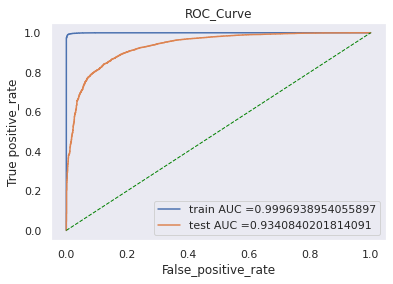

The AUC_score of test_data is : 0.9340840201814091


In [ ]:
#testing with the test data
model=RandomForestClassifier(max_depth=depth, n_estimators=estimators,class_weight='balanced') 
test_data(model,Train_tf_idf,Y_train,Test_tf_idf,Y_test)

              precision    recall  f1-score   support

           0       0.82      0.49      0.61      2237
           1       0.92      0.98      0.95     12763

    accuracy                           0.91     15000
   macro avg       0.87      0.73      0.78     15000
weighted avg       0.90      0.91      0.90     15000



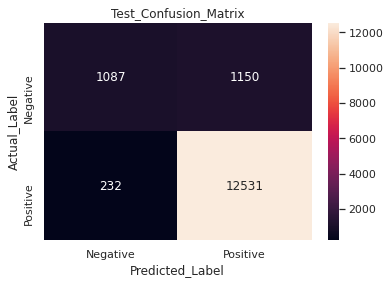

In [ ]:
#performance metric
model=RandomForestClassifier(max_depth=depth, n_estimators=estimators,class_weight='balanced') 
metric(model,Train_tf_idf,Y_train,Test_tf_idf,Y_test)

# Feature Importance on tfidf

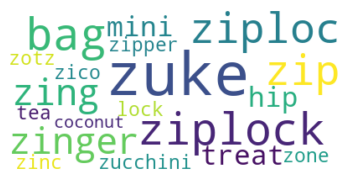

In [ ]:
# top 20 important features
model=RandomForestClassifier(max_depth=depth, n_estimators=estimators,class_weight='balanced') 
model.fit(Bow_train, Y_train)

weight=model.feature_importances_

all_features=tf_idf.get_feature_names()

features=np.argsort(all_features)[::-1]

data=''

for i in features[0:20]:
    data+=all_features[i]
    data+=' '
    
    
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(data)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Featurization using Word2Vec

In [ ]:
# Train your own Word2Vec model using your own text corpus
i=0
train_list_of_sentance=[]
for sentance in X_train:
    train_list_of_sentance.append(sentance.split())

In [ ]:
# Train your own Word2Vec model using your own text corpus for test data
i=0
test_list_of_sentance=[]
for sentance in X_test:
    test_list_of_sentance.append(sentance.split())

In [ ]:
print(len(train_list_of_sentance))
print(len(test_list_of_sentance))

35000
15000


In [ ]:
# Using Google News Word2Vectors
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
# min_count = 5 considers only words that occured atleast 5 times
train_w2v_model=Word2Vec(train_list_of_sentance,min_count=5,size=50, workers=4)    

In [ ]:
train_w2v_words = list(train_w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(train_w2v_words))
print("sample words ", train_w2v_words[0:50])

number of words that occured minimum 5 times  8348
sample words  ['love', 'walnut', 'especi', 'morn', 'oatmeal', 'simpli', 'delici', 'not', 'heavili', 'glaze', 'artifici', 'tast', 'addit', 'marvel', 'without', 'bitter', 'aftertast', 'yum', 'normal', 'green', 'tea', 'ginger', 'drinker', 'stomach', 'problem', 'suggest', 'rather', 'steep', 'fresh', 'tri', 'market', 'far', 'away', 'best', 'alway', 'least', 'one', 'cup', 'day', 'time', 'favorit', 'snack', 'like', 'whoopi', 'pie', 'dip', 'chocol', 'syrup', 'harden', 'cours']


In [ ]:
test_w2v_model=Word2Vec(test_list_of_sentance,min_count=5,size=50, workers=4)  
test_w2v_words = list(test_w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(test_w2v_words))
print("sample words ", test_w2v_words[0:50])

number of words that occured minimum 5 times  5742
sample words  ['one', 'delici', 'cooki', 'everi', 'shortbread', 'textur', 'tast', 'regular', 'gluten', 'counterpart', 'pecan', 'add', 'nice', 'crunch', 'chocol', 'keep', 'whole', 'thing', 'dri', 'wish', 'not', 'big', 'chunk', 'mayb', 'broken', 'chip', 'size', 'get', 'less', 'bite', 'matter', 'prefer', 'far', 'excel', 'moist', 'high', 'qualiti', 'love', 'packag', 'much', 'individu', 'perfect', 'pop', 'purs', 'later', 'light', 'snack', 'celiac', 'even', 'dont']


# Converting text into vectors using Avg W2V

In [ ]:
# average Word2Vec
# compute average word2vec for each review.
train_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in train_list_of_sentance: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in train_w2v_words:
            vec = train_w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    train_vectors.append(sent_vec)
train_vectors = np.array(train_vectors)
print(train_vectors.shape)
print(train_vectors[0])

(35000, 50)
[-0.04837625 -0.53836538 -0.84873137  0.58695121 -0.46726338  0.02494577
  0.23552729  0.5585849   0.07850445  1.03817591  0.31463691  0.75290316
 -0.29666566  0.35090638  0.15914766  0.49418786  0.11427121 -1.09891887
  0.15158751  0.57149506 -0.25827519  0.25502742 -0.83422987 -0.37451077
  0.08065609 -0.18562083 -0.55027804 -0.40738866  0.82786287 -0.64215073
 -0.01224874 -0.36499974 -0.12309118 -0.58900252 -0.1908912   0.27671917
  0.99517421  0.13420231  0.39755134 -0.07756573 -0.86371592  0.60547246
 -0.94378234 -0.59902502 -0.89069973  0.20325004  0.261378   -0.46884981
  0.22718161  0.17325132]


In [ ]:
# average Word2Vec
# compute average word2vec for each review.
test_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in test_list_of_sentance: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in test_w2v_words:
            vec = test_w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    test_vectors.append(sent_vec)
test_vectors = np.array(test_vectors)
print(test_vectors.shape)
print(test_vectors[0])

(15000, 50)
[-0.38390948 -0.55002492 -0.24091803  0.27048171 -1.12581623  0.18570857
  0.0209198   0.5143226   0.25703518  0.99592229  0.04558399  0.65022374
  0.19934086 -0.23234322  0.13331532  0.06466791  0.490079   -0.40677127
 -0.01513352  0.31812098  0.16400182  0.25876679 -0.72002078 -0.69701801
  0.76028217 -0.25672206 -0.47165923 -0.15407337 -0.16385094  0.19393679
  0.13084048 -0.13500675  0.16107533  0.22219137  0.09743103  0.49667757
  0.70725145  0.32261032 -0.17925934 -0.02623815 -0.38322953  0.16882408
 -0.68024998 -0.11432801 -0.58784723  0.25378176 -0.07806293 -0.42783139
  0.85319168  0.06798459]


In [ ]:
avgw2v_train= np.array(train_vectors)
avgw2v_test= np.array(test_vectors)

Applying Random Forest on Avgw2vec features,


**********AUC Score for CV data **********


Optimal depth: 30

Optimal estimators: 400

Best Score: 0.8803523945441302


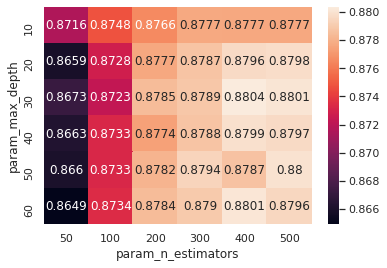

In [ ]:
#gridsearch for optimal depth and estimators
model=RandomForestClassifier() 
Grid_search(model,avgw2v_train,Y_train)

In [ ]:
#optimal depth and n_estimators by grid_search_cv
depth=30
estimators=400

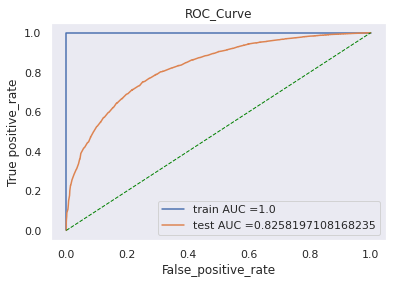

The AUC_score of test_data is : 0.8258197108168235


In [ ]:
#testing with the test data
model=RandomForestClassifier(max_depth=depth, n_estimators=estimators,class_weight='balanced') 
test_data(model,avgw2v_train,Y_train,avgw2v_test,Y_test)

              precision    recall  f1-score   support

           0       0.80      0.00      0.00      2237
           1       0.85      1.00      0.92     12763

    accuracy                           0.85     15000
   macro avg       0.83      0.50      0.46     15000
weighted avg       0.84      0.85      0.78     15000



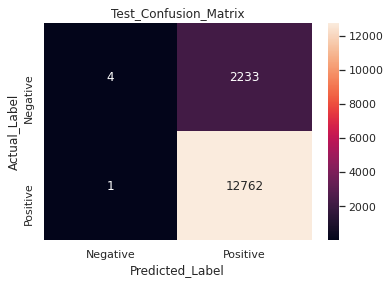

In [ ]:
#performance metric
model=RandomForestClassifier(max_depth=depth, n_estimators=estimators) 
metric(model,avgw2v_train,Y_train,avgw2v_test,Y_test)

# Converting text into vectors using TFIDF W2V

In [ ]:
tfidf_vect = TfidfVectorizer()
train_tfidf_w2v = tfidf_vect.fit_transform(X_train)

In [ ]:
dictionary = dict(zip(tfidf_vect.get_feature_names(), list(tfidf_vect.idf_)))

In [ ]:
# tf_idf_w2v words of train data
tfidf_feat = tfidf_vect.get_feature_names()
train_tfidf_w2v_vectors = []
row = 0
for sent in train_list_of_sentance:
    sent_vec = np.zeros(50)
    weight_sum = 0
    for word in sent:
        if word in train_w2v_words and word in tfidf_feat:
            vec = train_w2v_model.wv[word]
             #tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    train_tfidf_w2v_vectors.append(sent_vec)
    row += 1

In [ ]:
# tf_idf_w2v words of test data
tfidf_feat = tfidf_vect.get_feature_names()
test_tfidf_w2v_vectors = []
row = 0
for sent in test_list_of_sentance:
    sent_vec = np.zeros(50)
    weight_sum = 0
    for word in sent:
        if word in test_w2v_words and word in tfidf_feat:
            vec = test_w2v_model.wv[word]
            #tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    test_tfidf_w2v_vectors.append(sent_vec)
    row += 1

In [ ]:
tfidf_avgw2v_train= np.array(train_tfidf_w2v_vectors)
tfidf_avgw2v_test= np.array(test_tfidf_w2v_vectors)

Applying Random Forest on tfidfAvgw2vec features,


**********AUC Score for CV data **********


Optimal depth: 60

Optimal estimators: 500

Best Score: 0.84748391594856


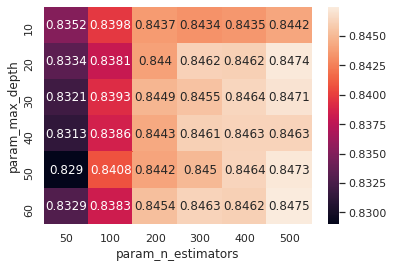

In [ ]:
#gridsearch for optimal depth and estimators
model=RandomForestClassifier() 
Grid_search(model,tfidf_avgw2v_train,Y_train)

In [ ]:
#optimal depth and n_estimators by grid_search_cv
depth=60
estimators=500

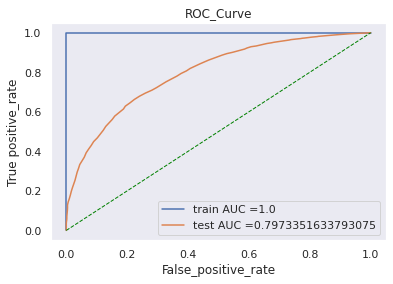

The AUC_score of test_data is : 0.7973351633793075


In [ ]:
#testing with the test data
model=RandomForestClassifier(max_depth=depth, n_estimators=estimators,class_weight='balanced') 
test_data(model,tfidf_avgw2v_train,Y_train,tfidf_avgw2v_test,Y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2237
           1       0.85      1.00      0.92     12763

    accuracy                           0.85     15000
   macro avg       0.43      0.50      0.46     15000
weighted avg       0.72      0.85      0.78     15000



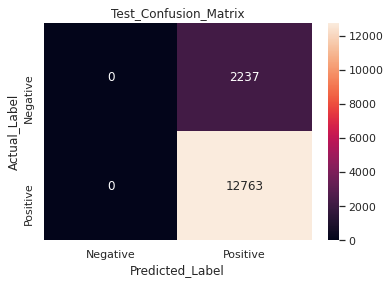

In [ ]:
#performance metric
model=RandomForestClassifier(max_depth=depth, n_estimators=estimators,class_weight='balanced') 
metric(model,tfidf_avgw2v_train,Y_train,tfidf_avgw2v_test,Y_test)

# Applying GBDT using XGBOOST

Applying XGBOOST on BOW Features

In [ ]:
#importing Library
from xgboost import XGBClassifier


**********AUC Score for CV data **********


Optimal depth: 10

Optimal estimators: 500

Best Score: 0.9289588793434606


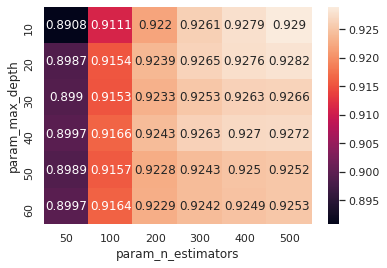

In [ ]:
#gridsearch for optimal depth and estimators
model= XGBClassifier(booster='gbtree')
Grid_search(model,Bow_train,Y_train)

In [ ]:
#optimal depth and n_estimators by grid_search_cv
depth=10
estimators=500

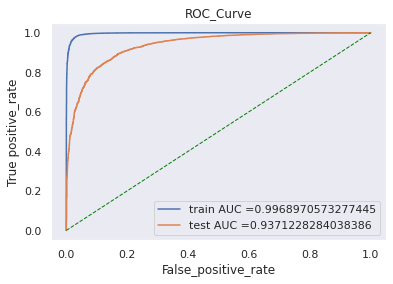

The AUC_score of test_data is : 0.9371228284038386


In [ ]:
#testing with test data
model=XGBClassifier(booster='gbtree',max_depth=depth, n_estimators=estimators,class_weight='balanced') 
test_data(model,Bow_train,Y_train,Bow_test,Y_test)

              precision    recall  f1-score   support

           0       0.81      0.55      0.66      2237
           1       0.93      0.98      0.95     12763

    accuracy                           0.91     15000
   macro avg       0.87      0.77      0.81     15000
weighted avg       0.91      0.91      0.91     15000



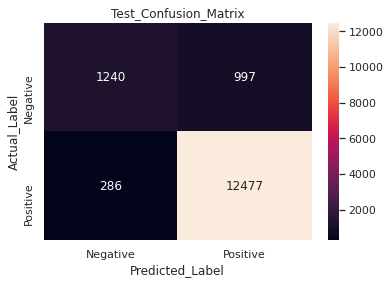

In [ ]:
#performance metric
model=XGBClassifier(booster='gbtree',max_depth=depth, n_estimators=estimators,class_weight='balanced') 
metric(model,Bow_train,Y_train,Bow_test,Y_test)

Applying XGBOOST on TFIDF Features


**********AUC Score for CV data **********


Optimal depth: 10

Optimal estimators: 500

Best Score: 0.9384685519390953


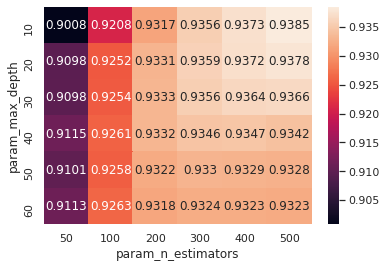

In [ ]:
#gridsearch for optimal depth and estimators
model= XGBClassifier(booster='gbtree')
Grid_search(model,Train_tf_idf,Y_train)

In [ ]:
#optimal depth and n_estimators by grid_search_cv
depth=10
estimators=500

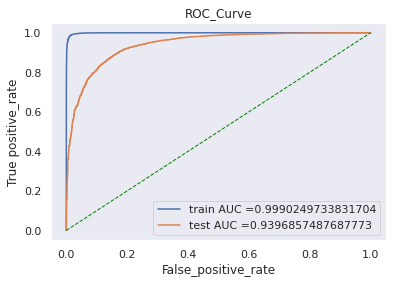

The AUC_score of test_data is : 0.9396857487687773


In [ ]:
#testing with the test data
model=XGBClassifier(booster='gbtree',max_depth=depth, n_estimators=estimators,class_weight='balanced') 
test_data(model,Train_tf_idf,Y_train,Test_tf_idf,Y_test)

              precision    recall  f1-score   support

           0       0.84      0.57      0.68      2241
           1       0.93      0.98      0.95     12759

    accuracy                           0.92     15000
   macro avg       0.88      0.77      0.81     15000
weighted avg       0.91      0.92      0.91     15000



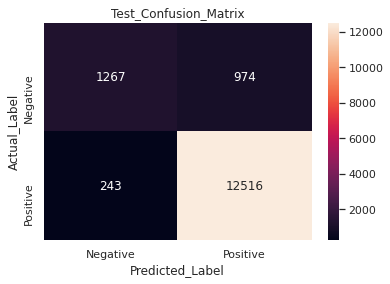

In [ ]:
#performance metric
model=XGBClassifier(booster='gbtree',max_depth=depth, n_estimators=estimators,class_weight='balanced') 
metric(model,Train_tf_idf,Y_train,Test_tf_idf,Y_test)

Applying XGBOOST on AVG_W2V Features


**********AUC Score for CV data **********


Optimal depth: 20

Optimal estimators: 500

Best Score: 0.90088694279727


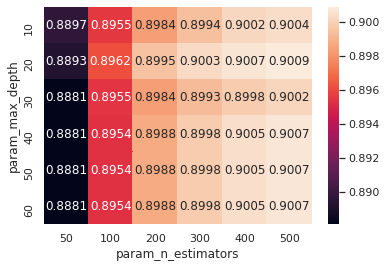

In [ ]:
#gridsearch for optimal depth and estimators
model= XGBClassifier(booster='gbtree')
Grid_search(model,avgw2v_train,Y_train)

In [ ]:
#optimal depth and n_estimators by grid_search_cv
depth=20
estimators=500

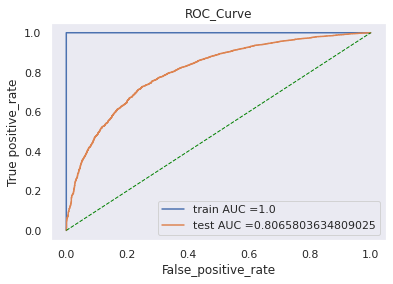

The AUC_score of test_data is : 0.8065803634809025


In [ ]:
#testing with the test data
model=XGBClassifier(booster='gbtree',max_depth=depth, n_estimators=estimators,class_weight='balanced') 
test_data(model,avgw2v_train,Y_train,avgw2v_test,Y_test)

              precision    recall  f1-score   support

           0       0.66      0.08      0.14      2241
           1       0.86      0.99      0.92     12759

    accuracy                           0.86     15000
   macro avg       0.76      0.53      0.53     15000
weighted avg       0.83      0.86      0.80     15000



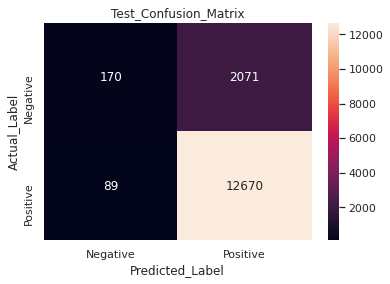

In [ ]:
#performance metric
model=XGBClassifier(booster='gbtree',max_depth=depth, n_estimators=estimators,class_weight='balanced') 
metric(model,avgw2v_train,Y_train,avgw2v_test,Y_test)

Applying XGBOOST on TFIDF_W2V Features


**********AUC Score for CV data **********


Optimal depth: 30

Optimal estimators: 500

Best Score: 0.8730151356218646


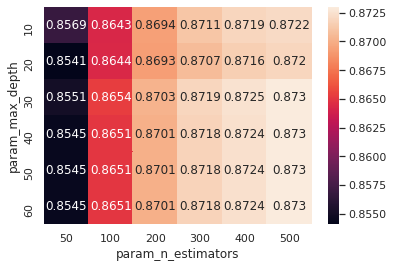

In [ ]:
#gridsearch for optimal depth and estimators
model= XGBClassifier(booster='gbtree')
Grid_search(model,tfidf_avgw2v_train,Y_train)

In [ ]:
#optimal depth and n_estimators by grid_search_cv
depth=30
estimators=500

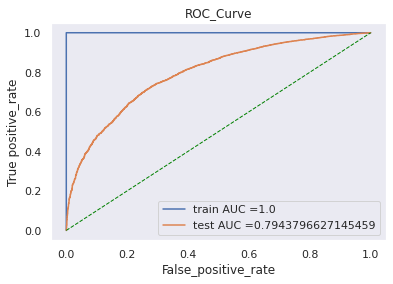

The AUC_score of test_data is : 0.7943796627145459


In [ ]:
#testing with the test data
model=XGBClassifier(booster='gbtree',max_depth=depth, n_estimators=estimators,class_weight='balanced') 
test_data(model,tfidf_avgw2v_train,Y_train,tfidf_avgw2v_test,Y_test)

              precision    recall  f1-score   support

           0       0.57      0.09      0.15      2237
           1       0.86      0.99      0.92     12763

    accuracy                           0.85     15000
   macro avg       0.72      0.54      0.53     15000
weighted avg       0.82      0.85      0.81     15000



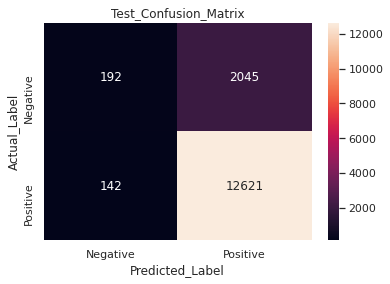

In [ ]:
#performance metric
model=XGBClassifier(booster='gbtree',max_depth=depth, n_estimators=estimators,class_weight='balanced') 
metric(model,tfidf_avgw2v_train,Y_train,tfidf_avgw2v_test,Y_test)

# Conclusion

In [ ]:
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names = ["Model","Vectorizer","Optimal Depth", "Optimal n_estimator", "AUC"]
x.add_row(["Random Forest","BOW",60,500,90.76])
x.add_row(["Random Forest","TFIDF",60,500,93.40])
x.add_row(["Random Forest","AvgW2v",30,400,82.58])
x.add_row(["Random Forest","TFIDF_AvgW2v",60,500,79.73])
x.add_row(["XGBOOST","BOW",10,500,93.71])
x.add_row(["XGBOOST","TFIDF",10,500,93.96])
x.add_row(["XGBOOST","AvgW2v",20,500,80.65])
x.add_row(["XGBOOST","TFIDF_AvgW2v",30,500,79.43])
print(x)

+---------------+--------------+---------------+---------------------+-------+
|     Model     |  Vectorizer  | Optimal Depth | Optimal n_estimator |  AUC  |
+---------------+--------------+---------------+---------------------+-------+
| Random Forest |     BOW      |       60      |         500         | 90.76 |
| Random Forest |    TFIDF     |       60      |         500         |  93.4 |
| Random Forest |    AvgW2v    |       30      |         400         | 82.58 |
| Random Forest | TFIDF_AvgW2v |       60      |         500         | 79.73 |
|    XGBOOST    |     BOW      |       10      |         500         | 93.71 |
|    XGBOOST    |    TFIDF     |       10      |         500         | 93.96 |
|    XGBOOST    |    AvgW2v    |       20      |         500         | 80.65 |
|    XGBOOST    | TFIDF_AvgW2v |       30      |         500         | 79.43 |
+---------------+--------------+---------------+---------------------+-------+


From the above table we conclude that TFIDF in Random Forest with a optimal Depth of 60 and optimal estimator of 500 have the Highest AUC score i.e 93.40 % and in XGBOOST also TFIDF with a optimal Depth of 10 and optimal estimator of 500 have the Highest AUC score i.e 93.96 %